<a href="https://colab.research.google.com/github/Vaibhav-sa30/Monty_Hall_Problem/blob/main/Monty_Hall_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall problem

Here is the problem taken from the [Wiki page](https://en.wikipedia.org/wiki/Monty_Hall_problem).

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the other two doors, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?"

> Is it to your advantage to switch your choice?

The assumptions (also taken from [Wiki](https://en.wikipedia.org/wiki/Monty_Hall_problem)) are as follows:
1. Car and goats are placed at random behind the doors.
2. Host always picks a door not chosen by contestant.
3. Host always reveals a goat and not a car.
4. Host always offers a choice to switch from the original door to the other closed door.

Under the above assumptions, here are the probabilities of winning.

P(win if contestant chooses to switch) = 2/3

P(win if contestant does not switch) = 1/3

You can see the Wiki page for the computation. Let us simulate and find the probability of winning under switch by Monte Carlo.

In [2]:
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

###Create a function for the host to reveal a door that doesn't contain the price AND the door that is not already chosen by the contestent originally.


In [3]:

def get_non_prize_door(host, num_doors, player_choice):
  i = 1
  while (i ==  host or i == player_choice):
    i = (i+1)%(num_doors)

  return i


###Create a function to have the player chose a door that is already been not chosen

In [4]:


def switch_door(shown_door, num_doors, player_choice):
  i = 1
  while (i == shown_door or i == player_choice):
    i = (i+1)%(num_doors)

  return i


##Let's Simulate THE GAME

In [5]:
#Create a function to simulate THE GAME

def monty_hall_game(switch, num_tests):

  win_switch_cnt = 0
  win_no_switch_cnt = 0
  lose_switch_cnt = 0
  lose_no_switch_cnt = 0

  doors = [0,1,2]
  num_doors = len(doors)

  #Loop through the number of times the contestant/player can play the game
  for i in range(0, num_tests):
    door_with_prize = random.randint(0, num_doors-1) #Randomly choose a door between [0,2]
    host = door_with_prize
    player_choice = random.randint(0, num_doors-1)
    original_player_choice = player_choice
    shown_door = get_non_prize_door(host, num_doors, player_choice)

    #if the player chooses to always switch, then allow the player to switch to their original chosen door to the other door.

    if switch == True:
      player_choice = switch_door(shown_door, num_doors, player_choice)

    if player_choice == door_with_prize  and switch == False:
      #Then the player wins from not switching
      print('Player Wins (No Switch) - The Player chose door ', player_choice, 'Original Door Choice: ', original_player_choice, 'Door with Prize: ', door_with_prize, 'Shown_Door: ', shown_door)
      win_no_switch_cnt += 1

    elif player_choice == door_with_prize  and switch == True:
      #Then the player wins from switching
      print('Player Wins (Switches) - The Player chose door ', player_choice, 'Original Door Choice: ', original_player_choice, 'Door with Prize: ', door_with_prize, 'Shown_Door: ', shown_door)
      win_switch_cnt += 1

    elif player_choice != door_with_prize  and switch == False:
      #Then the player loses from not switching
      print('Player Lost (No Switch) - The Player chose door ', player_choice, 'Original Door Choice: ', original_player_choice, 'Door with Prize: ', door_with_prize, 'Shown_Door: ', shown_door)
      lose_no_switch_cnt += 1

    elif player_choice != door_with_prize  and switch == True:
      #Then the player loses from switching
      print('Player Lost (Switches) - The Player chose door ', player_choice, 'Original Door Choice: ', original_player_choice, 'Door with Prize: ', door_with_prize, 'Shown_Door: ', shown_door)
      lose_switch_cnt += 1

    else:
      print('SOMETHING WENT WRONG')

  return win_no_switch_cnt, win_switch_cnt, lose_no_switch_cnt, lose_switch_cnt, num_tests



##Play the Game


In [6]:
x = monty_hall_game(True, 10)

Player Wins (Switches) - The Player chose door  0 Original Door Choice:  2 Door with Prize:  0 Shown_Door:  1
Player Wins (Switches) - The Player chose door  0 Original Door Choice:  1 Door with Prize:  0 Shown_Door:  2
Player Lost (Switches) - The Player chose door  0 Original Door Choice:  1 Door with Prize:  1 Shown_Door:  2
Player Wins (Switches) - The Player chose door  2 Original Door Choice:  1 Door with Prize:  2 Shown_Door:  0
Player Wins (Switches) - The Player chose door  1 Original Door Choice:  0 Door with Prize:  1 Shown_Door:  2
Player Lost (Switches) - The Player chose door  0 Original Door Choice:  2 Door with Prize:  2 Shown_Door:  1
Player Wins (Switches) - The Player chose door  2 Original Door Choice:  0 Door with Prize:  2 Shown_Door:  1
Player Wins (Switches) - The Player chose door  0 Original Door Choice:  1 Door with Prize:  0 Shown_Door:  2
Player Wins (Switches) - The Player chose door  1 Original Door Choice:  0 Door with Prize:  1 Shown_Door:  2
Player Win

###Get the win and lose percentage for switching and not switching


In [7]:

print("Win switch %:  ", x[1]/x[4])

print("Lose switch %:  ", x[3]/x[4])

print("Win No switch %:  ", x[0]/x[4])

print("Lose No switch %:  ", x[2]/x[4])

Win switch %:   0.8
Lose switch %:   0.2
Win No switch %:   0.0
Lose No switch %:   0.0


###Create a function to simulate a longer version of THE GAME

In [8]:
def monty_hall_game2(switch, num_tests):

  win_switch_cnt = 0
  win_no_switch_cnt = 0
  lose_switch_cnt = 0
  lose_no_switch_cnt = 0

  doors = [0,1,2]
  num_doors = len(doors)

  #Loop through the number of times the contestant/player can play the game
  for i in range(0, num_tests):
    door_with_prize = random.randint(0, num_doors-1) #Randomly choose a door between [0,2]
    host = door_with_prize
    player_choice = random.randint(0, num_doors-1)
    original_player_choice = player_choice
    shown_door = get_non_prize_door(host, num_doors, player_choice)

    #if the player chooses to always switch, then allow the player to switch to their original chosen door to the other door.

    if switch == True:
      player_choice = switch_door(shown_door, num_doors, player_choice)

    if player_choice == door_with_prize  and switch == False:
      #Then the player wins from not switching
      win_no_switch_cnt += 1

    elif player_choice == door_with_prize  and switch == True:
      #Then the player wins from switching
      win_switch_cnt += 1

    elif player_choice != door_with_prize  and switch == False:
      #Then the player loses from not switching
      lose_no_switch_cnt += 1

    elif player_choice != door_with_prize  and switch == True:
      #Then the player loses from switching
      lose_switch_cnt += 1

  return win_no_switch_cnt, win_switch_cnt, lose_no_switch_cnt, lose_switch_cnt, num_tests



###Let's get the win percentages of every case

In [9]:
y = monty_hall_game2(True, 10000)


print("Win switch %:  ", y[1]/y[4])

print("Lose switch %:  ", y[3]/y[4])

print("Win No switch %:  ", y[0]/y[4])

print("Lose No switch %:  ", y[2]/y[4])

Win switch %:   0.6665
Lose switch %:   0.3335
Win No switch %:   0.0
Lose No switch %:   0.0


# **TO SWITCH OR NOT TO SWITCH?**

So what is the answer to Monty Hall problem?

Not really 'answer', but what is a better choice when asked to switch the door or not?

\
A better question would be to ask...


**What decision has better probabability of making us WIN the car?**

or

What is the win percentage if I switch everytime if I play this game say 2000 times?

###Get the data to create visualization of the number of simulated tests/games played and the percentage of wins from always switching


In [10]:
num_tests = []
win_percentage = []
switch = True
#Run upto 2000 simulated games

for i in range(1, 2001):
  num_tests.append(i)
  y = monty_hall_game2(switch, i)
  win_percentage.append(y[1]/y[4])


###Monte Carlo Simulation of the Game

In [12]:
import numpy as np


def uniform(n, m):
  return np.random.randint(1, n+1, size = m)


no = 0   #variable for storing number of event occurence
for i in range(1000):
  car_loc = uniform(3, 1)
  if car_loc == 1:
    goat1_loc = 2; goat2_loc = 3
  elif car_loc == 2:
    goat1_loc = 1; goat2_loc = 3
  else:
    goat1_loc = 1; goat2_loc = 2

  contestant_orig = uniform(3, 1)
  if contestant_orig == goat1_loc:
    host_reveal_loc = goat2_loc; other_closed_door = car_loc
  elif contestant_orig == goat2_loc:
    host_reveal_loc = goat1_loc; other_closed_door = car_loc
  else:
    host_reveal_loc = goat1_loc; other_closed_door = goat2_loc
  if other_closed_door == car_loc:
    no = no + 1

print(no/1000) #probability estimate by Monte Carlo

0.665


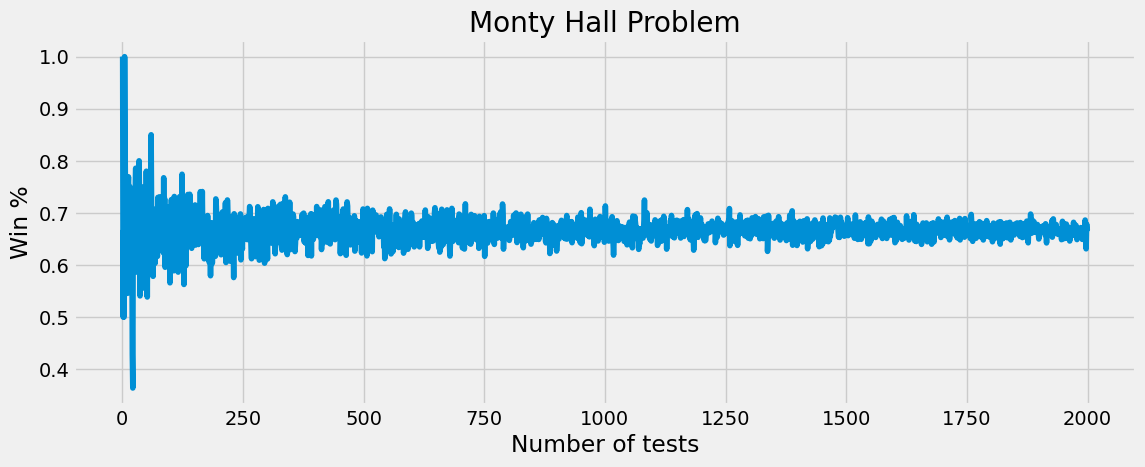

In [13]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(num_tests, win_percentage)
plt.title('Monty Hall Problem')
plt.xlabel('Number of tests')
plt.ylabel('Win %')
plt.show()

In [14]:
print('The win percentage for test playing ', y[4] , 'games is: ', y[1]/y[4]*100, '%')

The win percentage for test playing  2000 games is:  67.0 %


#Conclusion



It's easier to sum this up as:

\

The probability of winning by SWITCHING is higher than not switching, because the probability of winning by picking the correct door in your original choice is 1/3.

In order to lose by switching, you have to have picked right at first. So you will lose by switching 1/3 of the time. So switch.